In [1]:

!pip install yfinance

In [2]:
#  Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Download stock data 
data = yf.download("AAPL", start="2020-01-01", end="2023-12-31", auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538506,72.598884,71.292296,71.545882,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405670,72.444313,70.703005,70.954181,118387200
2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


In [5]:
# Prepare the data
df = data[['Open', 'High', 'Low', 'Volume', 'Close']].copy()
df.ffill(inplace=True)  # Fill missing values
df.dropna(inplace=True)  # Drop any remaining nulls

In [6]:
X = df[['Open', 'High', 'Low', 'Volume']]  
y = df['Close']  

In [7]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
#  Make predictions and evaluate
y_pred = model.predict(X_test)

In [10]:
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.9991804333251488
Mean Squared Error: 0.9048835631414801


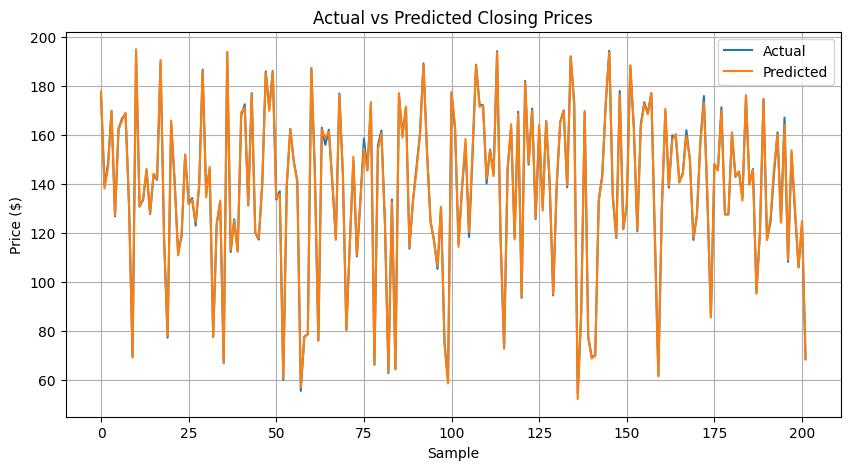

In [11]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Sample")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

In [12]:

plt.savefig("prediction_plot.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>